#  **ICT303 - Assignment 1**

**Your name: <enter here your full name>**

**Student ID: <enter here your student ID>**

**Email: <enter here your email address>**






## **1. Description**

In this homework, you will build, train, test and compare the performance of multilayer perceptrons (MLP) and convolutional neural networks (CNNs) on a multi-class classification problem.

For this task, you will use the image dataset available [here](https://drive.google.com/file/d/1nWRm-Npq_QE0j_sHyVVxVEx2Rb0Lc1zU/view?usp=sharing). This dataset contains 8 categories of images distributed as shown in the following structure (in total 22 directories):




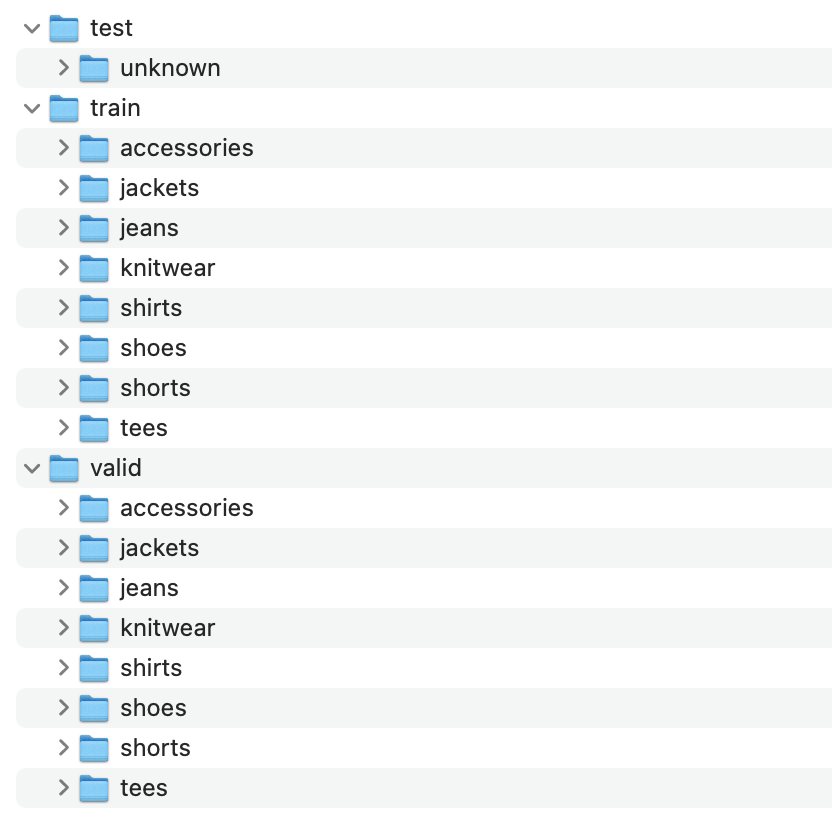


Your task is to:
1. Develop a multilayer perceptron model, train it and test it on the dataset. You need to finetune the hyperparameters to select those that provide the best performance. **[40 Marks]**
2. Implement VGG16, which a CNN architecture, train it and test it on the dataset. You must NOT use the pre-implemented VGG16 network in Pytorch. Instead, you have to implement all the layers and blocks yourself from scratch. You need to finetune the hyperparameters to select those that provide the best performance. **[40 Marks]**
3. Repeat step 2 above , but this time using the pretrained VGG16 network of PyTorch. **[20 Marks]**
4. For each of the tasks above, you need to finetune the hyper parameters to achieve the best performance possible.
5. Compare the performance of the three models.

It is important that you start as earlier as possible. Tuning hyper-parameters takes time, and Kaggle limits the number of submissions per day.

For Perth campus students, enrolled in internal model, you will be required to demonstrate your work in class. External students may be called to demonstrate the work to their tutor.

## **2. What do you need to submit**

You must submit:
- your source code, in the form of python libraries (i.e., .py files)
- A colab notebook that
 - Describes your solution and design choices. It is highly recommended to visually show the architecture of the networks you developed. You must include a discussion on how the hyper parameters affect performance and how did you select the ones you are currently using.
 - Demonstrates the training and testing of the machine learning models you developed.
 - Plots the training and validation curves for each model. You are requried to use TensorBoard for this task.
 - Analyzes the performance, in terms of Confusion Matrix and Mean Average Precision (MAE), of the methods, and how the hyper parameters affect this performance.
 - Allows the visualization of some classification results.

Important notes
- The performance of the machine learning models can be significantly affected by (1) the amount of data on which they are traiined, and (2) preprocessing, such as normalization, of the data (I will talk about this in class).
- Your program must be structured following what we have seen in the labs. In other words, you must use Object-oriented Programming and have a class for the data, a class for the model, a class for the trainer. You are allowed to reuse code you create in the labs. Also, you are allowed (in fact sometimes you should) reuse code across different models. For example, you only need one class to manage the data, whether you are using MLPs or CNNs (VGG16 in our case).
- We have zero tolerance for plagaiarsism and misconduct (e.g., asking AI to do the work for you).


In [1]:
# prompt: check if I have a gpu via pytorch

import torch

print(torch.cuda.is_available())

True


My own VGG16 implementation:

Import Dependencies

In [15]:
'''
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = ImageFolder("data/valid", transform=transform)

preprocessed = []
for img, label in tqdm(dataset):
    preprocessed.append((img, label))

torch.save(preprocessed, "preprocessed_valid.pt")
'''

100%|███████████████████████████████████████████████████████████████████████████████| 382/382 [00:01<00:00, 303.19it/s]


In [12]:
from collections import Counter
from tqdm import tqdm

In [3]:
import os # for some OS ops
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder # The data set that we will use
from torch.utils.tensorboard import SummaryWriter
from collections import Counter
!git clone https://github.com/Aithusa712/GoogleColab.git
%cd GoogleColab/Assignment\ 1
%cd "GoogleColab/Assignment 1"
print("Dependencies Loaded, Data downloaded!")

[WinError 3] The system cannot find the path specified: 'GoogleColab/Assignment\\ 1'
C:\Users\kim
C:\Users\kim\GoogleColab\Assignment 1
Dependencies Loaded, Data downloaded!


Cloning into 'GoogleColab'...
Updating files:  53% (2076/3881)
Updating files:  54% (2096/3881)
Updating files:  55% (2135/3881)
Updating files:  56% (2174/3881)
Updating files:  57% (2213/3881)
Updating files:  58% (2251/3881)
Updating files:  59% (2290/3881)
Updating files:  60% (2329/3881)
Updating files:  61% (2368/3881)
Updating files:  62% (2407/3881)
Updating files:  63% (2446/3881)
Updating files:  64% (2484/3881)
Updating files:  65% (2523/3881)
Updating files:  66% (2562/3881)
Updating files:  67% (2601/3881)
Updating files:  68% (2640/3881)
Updating files:  69% (2678/3881)
Updating files:  70% (2717/3881)
Updating files:  71% (2756/3881)
Updating files:  72% (2795/3881)
Updating files:  73% (2834/3881)
Updating files:  74% (2872/3881)
Updating files:  75% (2911/3881)
Updating files:  76% (2950/3881)
Updating files:  77% (2989/3881)
Updating files:  78% (3028/3881)
Updating files:  79% (3066/3881)
Updating files:  80% (3105/3881)
Updating files:  81% (3144/3881)
Updating file

Load tensorboard

In [4]:
%load_ext tensorboard
print("tensorboard extension loaded")

tensorboard extension loaded


MLP class (for testing/comparison)

In [5]:
## The MLP class
class myVGG16(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self, inputSize=32 * 32 * 3, outputSize=10, lr=0.01):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(inputSize, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, outputSize),
    )
    # Setting the learning rate
    self.lr = lr

  ## The forward step
  def forward(self, X):
    # Computes the output given the input X
    return self.layers(X)

  ## The loss function - Here, we will use Cross Entropy Loss
  def loss(self, y_hat, y):
    fn = nn.CrossEntropyLoss() # see https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
    return fn(y_hat, y)

  ## The optimization algorithm
  def configure_optimizers(self):
    # return torch.optim.SGD(self.parameters(), self.lr)
    return torch.optim.Adam(self.parameters(), self.lr)


VGG16 class

In [6]:
class myVGG16(nn.Module):
    def __init__(self, num_classes=10, lr=1e-3, class_weights=None):
        super().__init__()

        # VGG-16 feature blocks
        self.features = nn.Sequential(
            # conv1
            nn.Conv2d(3, 64, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # conv2
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # conv3
            nn.Conv2d(128, 256, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # conv4
            nn.Conv2d(256, 512, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # conv5
            nn.Conv2d(512, 512, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
        )

        # classifier head
        # For CIFAR-10’s 32×32 inputs, after 5 pools you get 1×1 spatial, so flatten → 512
        '''
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096), nn.ReLU(inplace=True), nn.Dropout(),
            nn.Linear(4096, 4096),        nn.ReLU(inplace=True), nn.Dropout(),
            nn.Linear(4096, num_classes)
        )
        '''
        # For 224x224 input
        self.classifier = nn.Sequential(
          nn.Linear(512 * 7 * 7, 4096),
          nn.ReLU(inplace=True),
          nn.Dropout(),
          nn.Linear(4096, 4096),
          nn.ReLU(inplace=True),
          nn.Dropout(),
          nn.Linear(4096, num_classes)
        )
        '''
        # For 300x432 inputs
        self.classifier = nn.Sequential(
          nn.Linear(512 * 9 * 13, 4096),  # 59832 input
          nn.ReLU(inplace=True),
          nn.Dropout(),
          nn.Linear(4096, 4096),
          nn.ReLU(inplace=True),
          nn.Dropout(),
          nn.Linear(4096, num_classes)
        )
        '''
        self.lr = lr
        self._init_weights()
        self.class_weights = class_weights
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        return self.classifier(x)

    def loss(self, y_hat, y):
       return nn.CrossEntropyLoss(weight=self.class_weights)(y_hat, y)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.lr)

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
                if m.bias is not None: nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.zeros_(m.bias)

Trainer

In [7]:

## The training loop
class Trainer:

  def __init__(self, tb, n_epochs = 3):
    self.max_epochs = n_epochs
    self.writer = tb  # the tensorboard instance
    return

  def fit(self, model, data, validation_data):

    self.data = data
    self.validation_data = validation_data


    # configure the optimizer
    self.optimizer = model.configure_optimizers()
    self.model     = model
    for epoch in range(self.max_epochs):
      print(f"\n🔁 Epoch {epoch + 1}/{self.max_epochs}")
      self.fit_epoch()
      self.validate_epoch()

      # Logging the average training loss so that it can be visualized in the tensorboard
      self.writer.add_scalar("Training Loss", self.avg_training_loss, epoch)
      self.writer.add_scalar("Validation Loss", self.avg_val_loss, epoch)
    print("Training process has finished")

  def fit_epoch(self):
    self.model.train()
    current_loss = 0.0
    self.avg_training_loss = 0.0

    # iterate over the DataLoader for training data
    for i, data in enumerate(self.data):
      # Get input
      inputs, target = data
      inputs, target = inputs.to(device), target.to(device)


      # Clear gradient buffers because we don't want any gradient from previous
      # epoch to carry forward, dont want to cummulate gradients
      self.optimizer.zero_grad()

      # get output from the model, given the inputs
      outputs = self.model(inputs)

      # get loss for the predicted output
      loss = self.model.loss(outputs, target)

      # get gradients w.r.t to the parameters of the model
      loss.backward()

      # update the parameters (perform optimization)
      self.optimizer.step()

      # Let's print some statistics (average of the training loss over minibatches of 500 data items)
      current_loss += loss.item()

      # Adding training loss
      self.avg_training_loss += loss.item()

      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

    # The average training loss
    self.avg_training_loss = self.avg_training_loss / i # to get the average
    print(f"Training Loss (avg): {self.avg_training_loss:.4f}")

  def validate_epoch(self):
    self.model.eval()
    total_loss = 0.0
    self.avg_val_loss = 0.0
    with torch.no_grad():
      # iterate over the DataLoader for training data
      for i, data in enumerate(self.validation_data):
        # Get input
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)

        # get output from the model, given the inputs
        outputs = self.model(inputs)

        # get loss for the predicted output
        loss = self.model.loss(outputs, target)

        # Let's print some statistics (average of the training loss over minibatches of 500 data items)
        #print(f"Batch {i+1} loss: {loss.item()}")  # DEBUG line
        total_loss += loss.item()

      # The average training loss
      self.avg_val_loss = total_loss / (i + 1) # to get the   average
      print(f"Validation Loss (avg): {self.avg_val_loss:.4f}")

Load images into preprocessed data (fixes a problem with slow training for my setup)

In [38]:
# Transform /w Data Augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

# Load datasets with ImageFolder
train_dataset = ImageFolder(root='data/train', transform=transform)
val_dataset   = ImageFolder(root='data/valid', transform=transform)

# Save train data
train_images = []
train_labels = []
for i, (img, label) in enumerate(train_dataset):
    train_images.append(img)
    train_labels.append(label)

train_images = torch.stack(train_images)
train_labels = torch.tensor(train_labels)
torch.save((train_images, train_labels), "train_tensor.pt")

# Save val data
val_images = []
val_labels = []
for i, (img, label) in enumerate(val_dataset):
    val_images.append(img)
    val_labels.append(label)

val_images = torch.stack(val_images)
val_labels = torch.tensor(val_labels)
torch.save((val_images, val_labels), "val_tensor.pt")

with open("classes.txt", "w") as f:
    for class_name in train_dataset.classes:
        f.write(f"{class_name}\n")

Main Program

In [52]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Parameters
batch_size = 32
n_epochs = 7

lr=3e-4

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/custom_dataset')


# 1. Loading the CIFAR-10 data set
# Transforms to apply to the data - More about this later


# Loading the data
train_images, train_labels = torch.load("train_tensor.pt")
val_images, val_labels = torch.load("val_tensor.pt")



train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)
val_dataset   = torch.utils.data.TensorDataset(val_images, val_labels)


# Print class Names
with open("classes.txt", "r") as f:
    class_names = [line.strip() for line in f]
print("classes:", class_names)

# Count labels in your training set
targets = [label for _, label in train_dataset]
label_counts = Counter(targets)


# Compute weight for each class: inverse frequency

num_classes = len(class_names)
label_counts = Counter(train_labels.tolist())



class_weights = []
for i in range(num_classes):
    count = label_counts[i]
    #weight = total_samples / (num_classes * count)
    weight = (1 / count) ** 0.5  # square root of inverse frequency
    class_weights.append(weight)

# Convert to tensor and move to GPU if available
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)


train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=12, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size, shuffle=False, num_workers=12, pin_memory=True)


# 2. The VGG16 Model

model = myVGG16(num_classes=num_classes, lr=lr,class_weights=class_weights).to(device)

# 3. Training the network

# 3.1. Creating the trainer class - note that here, I passed writer as a  parameter to the trainer
trainer = Trainer(writer, n_epochs)
# 3.2. Training the model
trainer.fit(model, train_loader, val_loader)

# Visualize
writer.close()

Using device: cuda
classes: ['accessories', 'jackets', 'jeans', 'knitwear', 'shirts', 'shoes', 'shorts', 'tees']

🔁 Epoch 1/7
Training Loss (avg): 1.9696
Validation Loss (avg): 1.5380

🔁 Epoch 2/7
Training Loss (avg): 1.0095
Validation Loss (avg): 0.5676

🔁 Epoch 3/7
Training Loss (avg): 0.6063
Validation Loss (avg): 0.6386

🔁 Epoch 4/7
Training Loss (avg): 0.4673
Validation Loss (avg): 0.3602

🔁 Epoch 5/7
Training Loss (avg): 0.4111
Validation Loss (avg): 0.3046

🔁 Epoch 6/7
Training Loss (avg): 0.3428
Validation Loss (avg): 0.3112

🔁 Epoch 7/7
Training Loss (avg): 0.2953
Validation Loss (avg): 0.2926
Training process has finished


In [40]:
tensorboard --logdir runs --port 6666

Reusing TensorBoard on port 6666 (pid 4040), started 0:15:41 ago. (Use '!kill 4040' to kill it.)

In [53]:
def evaluate_accuracy(model, dataloader, class_names=None):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"{accuracy:.2f}%")
    return

print("Training Accuracy:")
evaluate_accuracy(model, train_loader)
print("Validation Accuracy:")
evaluate_accuracy(model, val_loader)



Training Accuracy:
92.07%
Validation Accuracy:
89.79%


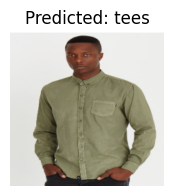

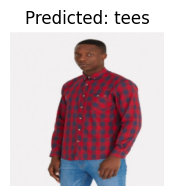

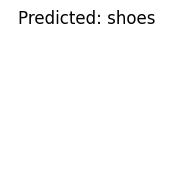

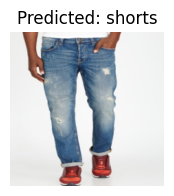

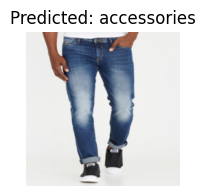

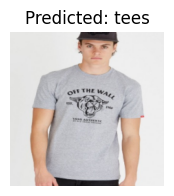

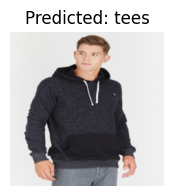

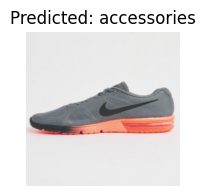

In [55]:
transform = transforms.Compose([
    #transforms.Resize((32, 32)),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load test data (unlabeled)
test_dataset = ImageFolder(root='data/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Use class names from training set
#class_names = train_dataset.classes

# Function to denormalize and convert image tensor to numpy for matplotlib
def imshow(img_tensor):
    img = img_tensor.squeeze(0).cpu().numpy()
    img = img.transpose((1, 2, 0))  # CHW -> HWC
    img = (img * 0.5) + 0.5  # Unnormalize
    plt.imshow(img)
    plt.axis('off')

# Predict and show images
model.eval()
with torch.no_grad():
    for i, (inputs, _) in enumerate(test_loader):
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Show image
        plt.figure(figsize=(2, 2))
        imshow(inputs.cpu())
        plt.title(f"Predicted: {class_names[predicted.item()]}")
        plt.show()